Number of files found: 60
Data loaded successfully.


/var/folders/k6/5yyvttjx6_ggy10gxd30kzz80000gn/T/ipykernel_7659/309801976.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['FlowType'] = filtered_data.apply(


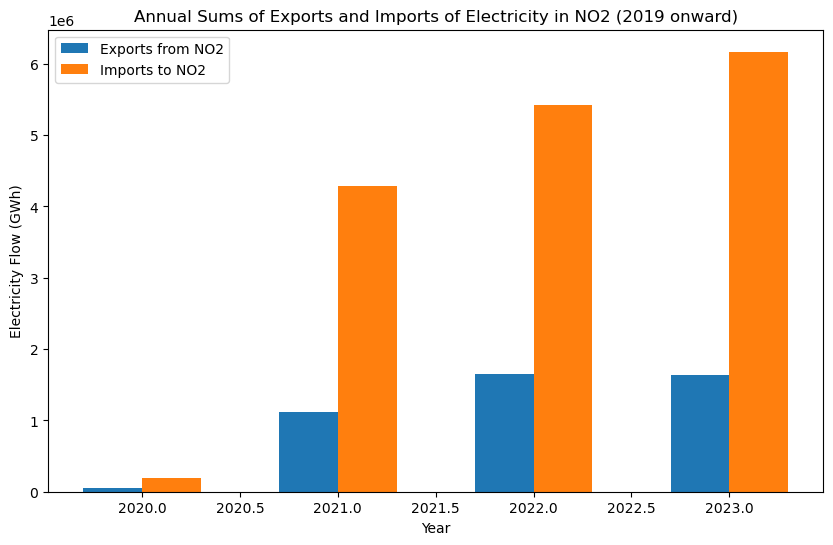

In [18]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

# Set the path to your folder containing the CSV files
folder_path = '/Users/jsalexander/Repos/TermPaper/group-term-paper/data/PhysicalFlows_12.1.G'

# Use glob to list all CSV files in the folder matching the pattern "YYYY_MM_PhysicalFlows_12.1.G.csv"
all_files = glob.glob(os.path.join(folder_path, "*_PhysicalFlows_12.1.G.csv"))

# Load each CSV file with tab delimiter and concatenate them into a single DataFrame
if all_files:
    print(f"Number of files found: {len(all_files)}")

    # Load each file with tab as the delimiter
    df_list = [pd.read_csv(file, delimiter='\t') for file in all_files]

    # Concatenate all DataFrames into a single DataFrame
    data = pd.concat(df_list, ignore_index=True)
    print("Data loaded successfully.")
    
    # Ensure columns are named correctly
    data.columns = ['DateTime', 'InMapCode', 'OutMapCode', 'FlowValue']

    # Convert 'DateTime' to datetime format
    data['DateTime'] = pd.to_datetime(data['DateTime'])

    # Extract the year for grouping
    data['Year'] = data['DateTime'].dt.year

    # Filter the data to include only flows involving NO2 and DE_LU
    filtered_data = data[(data['Year'] >= 2019) & 
                         (((data['InMapCode'] == 'NO2') & (data['OutMapCode'] == 'DE_LU')) | 
                          ((data['InMapCode'] == 'DE_LU') & (data['OutMapCode'] == 'NO2')))]

    # Define a new column to specify whether it is an export or import for NO2
    filtered_data['FlowType'] = filtered_data.apply(
        lambda row: 'Export' if row['OutMapCode'] == 'DE_LU' else 'Import', axis=1
    )

    # Group by year and FlowType, then sum the FlowValue to get the annual totals for exports and imports
    annual_flows = filtered_data.groupby(['Year', 'FlowType'])['FlowValue'].sum().unstack()
    annual_flows = annual_flows.fillna(0)  # Fill any missing values with 0

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(annual_flows.index - 0.15, annual_flows['Export'], width=0.3, label='Exports from NO2')
    plt.bar(annual_flows.index + 0.15, annual_flows['Import'], width=0.3, label='Imports to NO2')

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Electricity Flow (GWh)')
    plt.title('Annual Sums of Exports and Imports of Electricity in NO2 (2019 onward)')
    plt.legend()












   





